In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
datasets_path = '../datasets/'
try:
    usd = os.path.join(datasets_path, 'USD_IDR.csv')
    yjp = os.path.join(datasets_path, 'YJP_IDR.csv')
except:
    print('Load datasets failed!')

In [3]:
usd = pd.read_csv(usd, sep=',', header = 0, index_col=0)
yjp = pd.read_csv(yjp, sep=',', header = 0, index_col=0)

In [5]:
usd.iloc[0:, 0:1]

,Rate**
Date (GMT),
20 Oct 2014,12112.00
21 Oct 2014,11973.00
22 Oct 2014,11985.00
23 Oct 2014,12018.00
24 Oct 2014,12058.00
...,...
14 Oct 2019,14127.00
15 Oct 2019,14164.05
16 Oct 2019,14178.50


In [6]:
usd_series = usd.values
yjp_series = yjp.values

In [7]:
usd_series, yjp_series

(array([[12112. ],
        [11973. ],
        [11985. ],
        ...,
        [14178.5],
        [14160. ],
        [14139. ]]),
 array([[113.32],
        [112.03],
        [112.37],
        ...,
        [130.43],
        [130.48],
        [130.4 ]]))

<AxesSubplot:xlabel='Date (GMT)'>

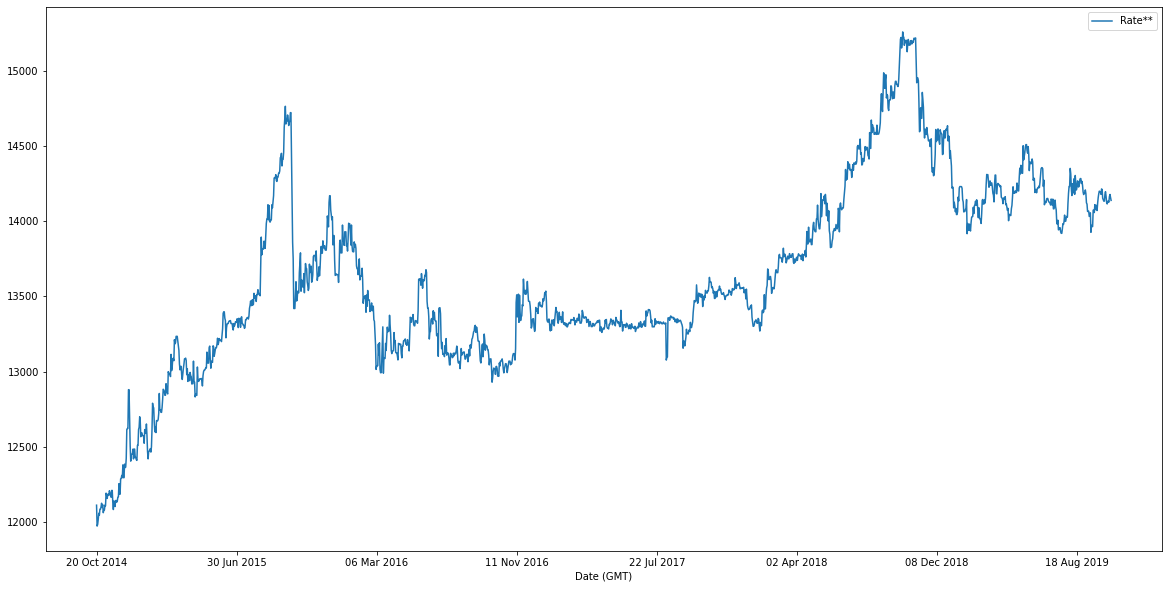

In [8]:
usd.iloc[0:, 0:1].plot(figsize = (20,10))

<AxesSubplot:xlabel='Date (GMT)'>

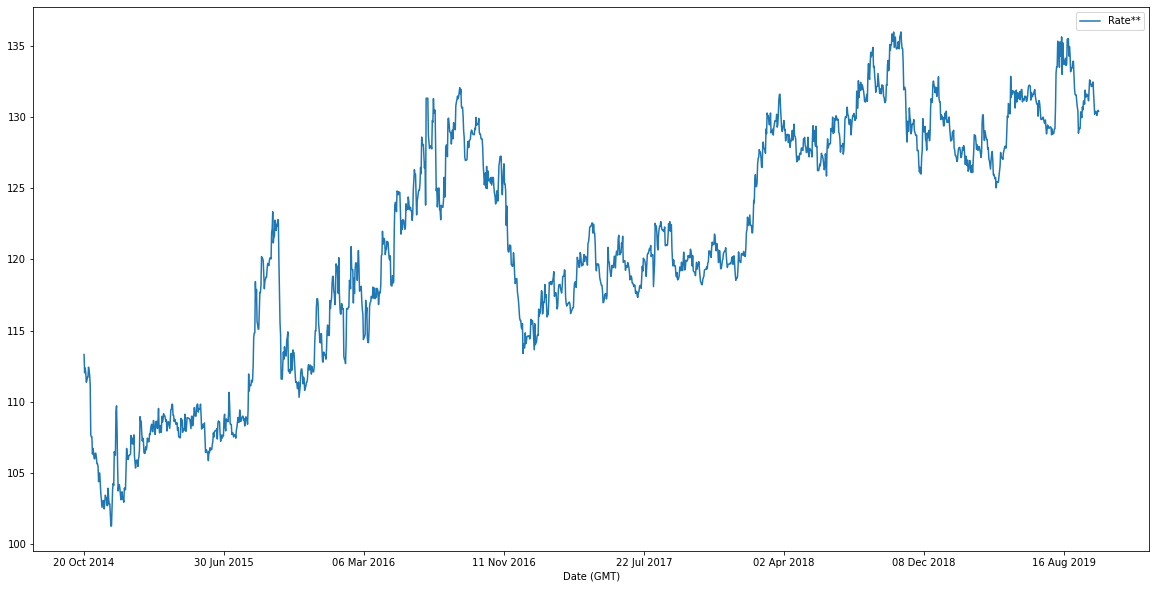

In [10]:
yjp.iloc[0:, 0:1].plot(figsize = (20,10))

In [12]:
yjp.iloc[0:, 0:1]

,Rate**
Date (GMT),
20 Oct 2014,113.32
21 Oct 2014,112.03
22 Oct 2014,112.37
23 Oct 2014,112.05
24 Oct 2014,111.37
...,...
14 Oct 2019,130.35
15 Oct 2019,130.12
16 Oct 2019,130.43


In [43]:
def deltaApproach(a, b):
    ret = b-a
    ret = ret/a

    return ret 
    


In [48]:
delta_usd = deltaApproach(a=usd_series[0], b=usd_series[len(usd_series)-1])
delta_yjp = deltaApproach(a=yjp_series[0], b=yjp_series[len(yjp_series)-1])

In [49]:
delta_usd*100, delta_yjp*100

(array([16.73546896]), array([15.07236145]))

In [52]:
def SplitData(data, idx_train=.8, idx_test=.2):
    dump = data
    if((idx_train+idx_test) != 1):
        print("Perbandingan jumlah data training dan testing tidak valid !")
        return 0
    else:
        train_size = int(len(dump) * idx_train)
        #proses input train test
        training = dump.data[0:train_size-1]
        testing = dump.data[train_size-1:len(dump)]
    
    training = np.array(training)
    testing = np.array(testing)

    return training, testing

In [53]:
usd_training, usd_testing = SplitData(data=usd_series)
yjp_training, yjp_testing = SplitData(data=yjp_series)

In [56]:
len(usd_training), len(usd_testing), len(yjp_training), len(yjp_testing)


(1448, 364, 1449, 364)

In [83]:
# plot training testing
def Ploting(a, b):
    plt.plot(a)
    plt.plot([None for i in a] + [x for x in b])
    plt.plot(figsize = (20,10))
    plt.legend(['Training', 'Testing'])
    plt.show()

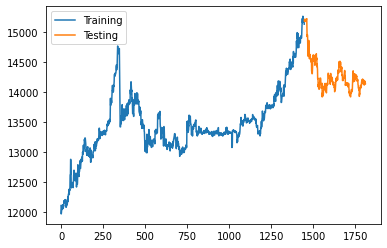

In [84]:
Ploting(a=usd_training, b=usd_testing)

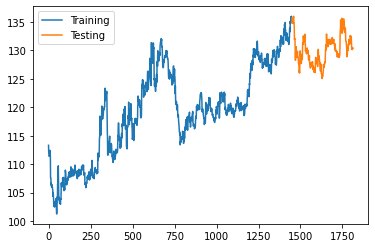

In [85]:
Ploting(a=yjp_training, b=yjp_testing)